In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
from torchvision import transforms
from __future__ import print_function, division
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!pip install patool
import patoolib
import os
os.mkdir("/content/dataset")
patoolib.extract_archive("/content/drive/MyDrive/YOLO/dataset.rar", outdir="/content/dataset")
#!unrar x "/content/drive/MyDrive/YOLO/dataset" "/content/dataset"
!unzip "/content/drive/MyDrive/YOLO/Regular Track - Files for Assignment 3.zip" -d "/content/naloga"   

In [ ]:
import torchvision
import torch
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize([128, 64]),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize([128, 64]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

train_directory = "/content/dataset/train"
#print(train_set)
#print(len(train_set))
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_set, [train_size, val_size], generator=torch.Generator().manual_seed(42))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8,
                                          shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8,
                                          shuffle=True, num_workers=2)


image_datasets = {'train': train_dataset, 'val': val_dataset}
dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
!rm -R /content/dataset/test_data/.ipynb_checkpoints
from torch.utils.data import DataLoader 
test_dataset = torchvision.datasets.ImageFolder(root="/content/dataset/test", transform=data_transforms['val'])
test_loader = DataLoader(test_dataset, batch_size=64, num_workers=2)

In [ ]:
train_losses = []
val_losses = []

train_accuracies = []
val_accuracies = []

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

    

        running_loss = 0.0
        running_corrects = 0
        print("training")
        for inputs, labels in train_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            scheduler.step()
        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        print('Train Loss: {:.4f} Acc: {:.4f}'.format(
        epoch_loss, epoch_acc))

        print()
        print("evaluating")
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            val_losses.append(epoch_loss)
            val_accuracies.append(epoch_acc)
            print('Validation Loss: {:.4f} Acc: {:.4f}'.format(
            epoch_loss, epoch_acc))
            if epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), "resnet2_best.pth")

            # Iterate over data.
        print()

  
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    return model

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 100)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=25)

cuda:0
Epoch 0/24
----------
training
train Loss: 4.1560 Acc: 0.1028
evaluating
val Loss: 3.8958 Acc: 0.1352

Epoch 1/24
----------
training
train Loss: 2.4132 Acc: 0.4465
evaluating
val Loss: 3.2486 Acc: 0.2523

Epoch 2/24
----------
training
train Loss: 1.2691 Acc: 0.7122
evaluating
val Loss: 2.9933 Acc: 0.3079

Epoch 3/24
----------
training
train Loss: 0.6935 Acc: 0.8580
evaluating
val Loss: 2.9197 Acc: 0.3380

Epoch 4/24
----------
training
train Loss: 0.4375 Acc: 0.9139
evaluating
val Loss: 2.9004 Acc: 0.3661

Epoch 5/24
----------
training
train Loss: 0.2770 Acc: 0.9498
evaluating
val Loss: 2.9011 Acc: 0.3474

Epoch 6/24
----------
training
train Loss: 0.1866 Acc: 0.9679
evaluating
val Loss: 2.9008 Acc: 0.3722

Epoch 7/24
----------
training
train Loss: 0.1106 Acc: 0.9879
evaluating
val Loss: 2.7716 Acc: 0.3956

Epoch 8/24
----------
training
train Loss: 0.0912 Acc: 0.9915
evaluating
val Loss: 2.7148 Acc: 0.3956

Epoch 9/24
----------
training
train Loss: 0.0818 Acc: 0.9931
eval

NameError: ignored

In [ ]:
class ResNet(nn.Module):
  def __init__(self, n_classes):
    super().__init__()
    resnet = torchvision.models.resnet50(pretrained=True)
    resnet.fc = nn.Sequential(
      nn.Linear(in_features=2048, out_features=1024),
      nn.ReLU(),
      nn.Dropout(p=0.2),
      nn.Linear(in_features=1024, out_features=512),
      nn.ReLU(),
      nn.Dropout(p=0.2),
      nn.Linear(in_features=512, out_features=n_classes),
    )
    self.base_model = resnet
    self.sigm = nn.Sigmoid()
  def forward(self, x):
      return self.base_model(x)

In [ ]:
criterion = nn.CrossEntropyLoss()
from torch.optim import lr_scheduler
model = ResNet(100)
model.to(device)
#num_features = model.fc.in_features
#model.fc = nn.Linear(num_features, 100)
#model.load_state_dict(torch.load("/content/model3_weights_epoch1.pth"))
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, scheduler, num_epochs=25)

Epoch 0/24
----------
training
train Loss: 4.6024 Acc: 0.0123
evaluating
val Loss: 4.5693 Acc: 0.0201

Epoch 1/24
----------
training
train Loss: 4.5313 Acc: 0.0252
evaluating
val Loss: 4.4659 Acc: 0.0489

Epoch 2/24
----------
training
train Loss: 4.3137 Acc: 0.0529
evaluating
val Loss: 4.1540 Acc: 0.0830

Epoch 3/24
----------
training
train Loss: 3.7424 Acc: 0.1283
evaluating
val Loss: 3.7488 Acc: 0.1406

Epoch 4/24
----------
training
train Loss: 2.9576 Acc: 0.2495
evaluating
val Loss: 3.5895 Acc: 0.1774

Epoch 5/24
----------
training
train Loss: 2.3411 Acc: 0.3772
evaluating
val Loss: 3.3041 Acc: 0.2510

Epoch 6/24
----------
training
train Loss: 1.7149 Acc: 0.5233
evaluating
val Loss: 3.3813 Acc: 0.3039

Epoch 7/24
----------
training
train Loss: 1.0732 Acc: 0.7215
evaluating
val Loss: 2.9973 Acc: 0.3313

Epoch 8/24
----------
training
train Loss: 0.8374 Acc: 0.7892
evaluating
val Loss: 2.8974 Acc: 0.3427

Epoch 9/24
----------
training
train Loss: 0.7169 Acc: 0.8169
evaluating


In [ ]:
!rm -R /content/dataset/test/.ipynb_checkpoints
from torch.utils.data import DataLoader 
test_dataset = torchvision.datasets.ImageFolder(root="/content/dataset/test", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, num_workers=2)

rm: cannot remove '/content/dataset/test/.ipynb_checkpoints': No such file or directory


In [ ]:
correct_pred = {classname: 0 for classname in range(100)}
total_pred = {classname: 0 for classname in range(100)}
import torch

model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 100)
model.load_state_dict(torch.load("resnet_best.pth"))
model.eval()
# again no gradients needed
with torch.no_grad():
    curr_loss = 0.0
    num_correct = 0
    num_all = 0

    for data in test_loader:
        images, targets = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        #print(predictions)
        # collect the correct predictions for each class
        num_correct += torch.sum(predictions == targets.data)
        num_all += targets.size(0)
    acc = num_correct.double() / num_all
    print(acc.item())

# print accuracy for each class
#for classname, correct_count in correct_pred.items():
    #accuracy = 100 * float(correct_count) / total_pred[classname]
    #print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
print(f'Test accuracy: ' + str(acc.item()))

0.2755102040816326
Test accuracy: 0.2755102040816326


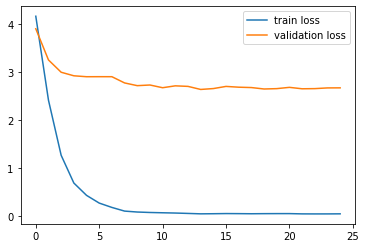

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.legend()

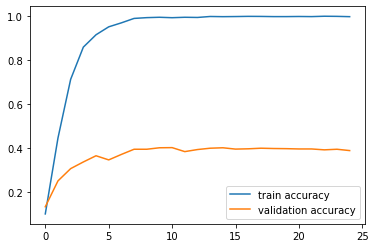

In [ ]:
plt.figure()
plt.plot(train_accuracies , label="train accuracy")
plt.plot(val_accuracies, label="validation accuracy")
plt.legend()

In [ ]:
model = ResNet(100)
model.to(device)

correct_pred = {classname: 0 for classname in range(100)}
total_pred = {classname: 0 for classname in range(100)}
import torch
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).

model.load_state_dict(torch.load("resnet2_best.pth"))
model.eval()
# again no gradients needed
with torch.no_grad():
    curr_loss = 0.0
    num_correct = 0
    num_all = 0

    for data in test_loader:
        images, targets = data
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        #print(predictions)
        # collect the correct predictions for each class
        num_correct += torch.sum(predictions == targets.data)
        num_all += targets.size(0)
    acc = num_correct.double() / num_all
    print(acc.item())

# print accuracy for each class
#for classname, correct_count in correct_pred.items():
    #accuracy = 100 * float(correct_count) / total_pred[classname]
    #print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
print(f'Test accuracy: ' + str(acc.item()))

0.24149659863945577
Test accuracy: 0.24149659863945577


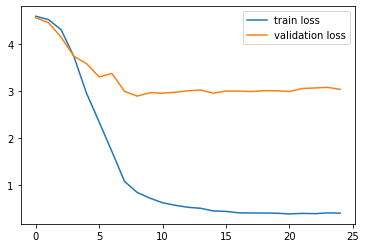

In [ ]:
plt.figure()
plt.plot(train_losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.legend()

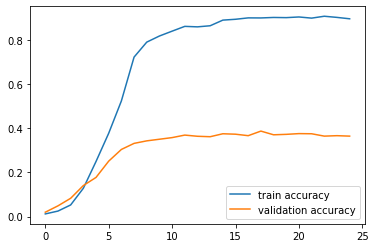

In [ ]:
plt.figure()
plt.plot(train_accuracies , label="train accuracy")
plt.plot(val_accuracies, label="validation accuracy")
plt.legend()